In [14]:
from __future__ import division
import librosa.display
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import csv
import os
import numpy as np 
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import glob
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import statistics

In [13]:
# for i in tqdm(range(10)):
#     print(i)


In [16]:
# get file paths

audio_paths = sorted(glob.glob('data/MDB-stem-synth/audio_stems/*'))
csv_paths = sorted(glob.glob('data/MDB-stem-synth/annotation_stems/*'))
#print(audio_paths)

#print('Nb files: ', len(audio_paths))

audio_paths = audio_paths[:5] #only for specified number of files
csv_paths = csv_paths[:5]

# load in audio and get the length of each file
audio_data = []
audio_lenlist = []
audio_metadata = {'min':[],'max':[], 'mean':[], 'std':[], 'silence':[]}

for path in audio_paths:
    #for i in tqdm(range(10)):
    
    audio, sr = librosa.load(path)
    audio_data.extend(audio)

    # Analysis
    audio_len = [len(audio)] #store each file length in a list
    audio_lenlist.extend(audio_len) #extend the list

    audio_metadata['min'].append(min(audio))
    audio_metadata['max'].append(max(audio))
    audio_metadata['mean'].append(np.mean(audio))
    audio_metadata['std'].append(np.std(audio))

    audio_metadata['silence'].append(np.sum(audio == 0))
    

print('Length of each audio:', audio_lenlist)

# load in csv files and get the length of each file, etc

csv_data = []
csv_lenlist = []
for path in csv_paths:
    timestep, pitch_data = np.loadtxt(path, delimiter=',',unpack=True)
    csv_data.extend(pitch_data)
    
    # Analysis
    csv_len = [len(pitch_data)]
    csv_lenlist.extend(csv_len)

# print('Min of csv data:', min(csv_lenlist))        
# print('Max of csv data:', max(csv_lenlist))
# print('Stdev of csv data:', statistics.stdev(csv_lenlist))
# print('Mean of csv data:', statistics.mean(csv_lenlist))
print('Length of each annotation file:', csv_lenlist)  

Length of each audio: [3780256, 3780256, 3780256, 4173391, 4173391]
Length of each annotation file: [59067, 59067, 59067, 65210, 65210]


In [17]:
# Data + preprocess
# Load in all data here
# idx = 10
# audio_paths = sorted(glob.glob('data/MDB-stem-synth/audio_stems/*'))
# csv_paths = sorted(glob.glob('data/MDB-stem-synth/annotation_stems/*'))

# # Make sure they are the same indexed files
# # filename = os.path.basename(csvfiles[idx]).rstrip('.csv')
# # audio_path = os.path.join('data/MDB-stem-synth/audio_stems/', filename + '.wav')
# # csv_path = os.path.join('data/MDB-stem-synth/audio_stems/', filename + '.csv')

# audio_data = []
# for f in audio_paths:
#      = os.path.basename(csvfiles[idx]).rstrip('.csv')
#     audio_path = os.path.join('data/MDB-stem-synth/audio_stems/', filename + '.wav')

# filename_audio = [os.path.basename(f).rstrip('.wav') for f in audiofiles]
# filename_csv = [os.path.basename(f).rstrip('.csv') for f in csvfiles]
# #print(filename_audio)
# # Get the length of each audio and csv file then plot histogram


68

In [ ]:
# helper fiunctions 

min: [-0.1351861, -0.061689693, -0.1062607, -0.3340406, -0.21277691]
max: [0.13749564, 0.09613072, 0.15142423, 0.24666685, 0.22890797]
mean: -1.5530928e-05
std: 0.02555462
silence rate: 0.41616356529888177


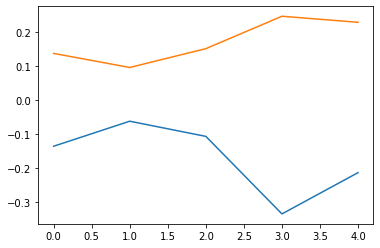

In [9]:
print('min:', (audio_metadata['min']))
print('max:', (audio_metadata['max']))
print('mean:', np.mean(audio_metadata['mean']))
print('std:', np.std(audio_metadata['std']))
print('silence rate:', np.sum(audio_metadata['silence'])/np.sum(audio_lenlist))

plt.plot(audio_metadata['min'])
plt.plot(audio_metadata['max'])

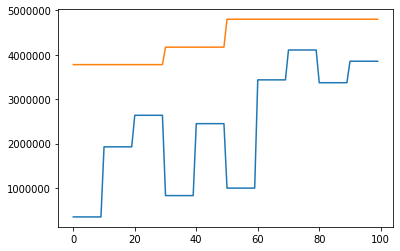

In [6]:
plt.plot(audio_metadata['silence'])
plt.plot(audio_lenlist)

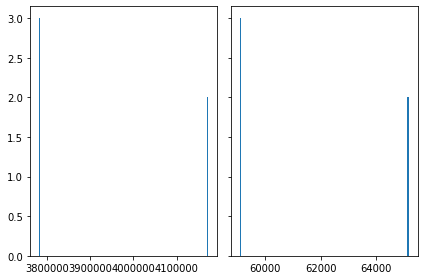

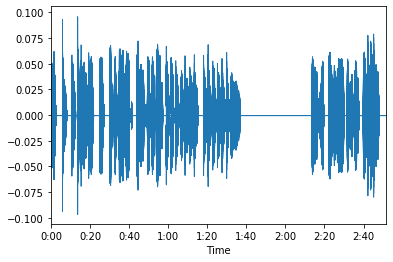

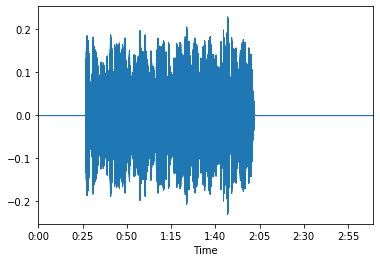

In [11]:
# Analysis
# Audio - length of tracks, visualise and play audio, data range(min,max,mean,std), silence percentage

#csv_length = [len(filename_csv) for f in filename_csv]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(audio_lenlist, bins=100)
axs[1].hist(csv_lenlist, bins=100)
plt.show()

# Plot some audio files: 2 files of different lengths
#print(audio_paths[1])
path = audio_paths[1]
raw_audio, sr = librosa.load(path)

librosa.display.waveplot(raw_audio, sr=sr)
plt.show()

path2 = audio_paths[4]
raw_audio2, sr = librosa.load(path2)

librosa.display.waveplot(raw_audio2, sr=sr)
plt.show()
# csv - number of points (unique examples), check files exist of all csv

In [ ]:
# preprocess

# split dataset into train and test sets (90, 10)

# audio - Normalize [-1,1], remove silence, save as .npy 

# csv - 

# save these files in the following format:

Directory format 

- data/<name>
    - train
        - audio
        - csv
    - test
        - audio
        - csv 


In [21]:
l = ['a','b','c','d']

In [23]:
for i, item in enumerate(l):
    print(l[i])
    print(item)

a
a
b
b
c
c
d
d


In [33]:
l = [1,2,3,4,5,6,7,8,9,10]
c = 'a b c d e f g'.split()

In [27]:
import random
length = len(l)
num_files = int(length*0.9) # 90% of files for train folder
rand_output = random.sample(l, num_files)

num_files2 = int(length*0.1) # 10% of files for test folder
rand_output2 = random.sample(l, num_files2)

In [28]:
rand_output

[7, 1, 9, 6, 2, 8, 4, 3, 10]

In [30]:
rand_output2

[6]

In [37]:
length = len(c)
num_files = int(length*0.9) # 90% of files for train folder
rand_output = random.sample(c, num_files)

num_files2 = int(length*0.1) # 10% of files for test folder
rand_output2 = random.sample(c, num_files2)

In [38]:
rand_output

['f', 'g', 'c', 'd', 'b', 'a']

In [39]:
rand_output2

[]

In [56]:
import numpy as np
a = np.array([0,1,2,3,4]) 
b = np.array([5,6,7,8,9])

indices = np.arange(a.shape[0])
np.random.shuffle(indices)

train_idx = indices[:4]
test_idx = indices[4:]

a_train = a[train_idx]
b_train = b[train_idx]

a_test = a[test_idx]
b_test = b[test_idx]

None


In [55]:
print(a_test, a_train)
print(b_test, b_train)

[3] [2 0 1 4]
[8] [7 5 6 9]
